In [27]:
# ====== ANÁLISIS DE EMAIL MARKETING PARA SERVICIOS BANCARIOS ======
# Departamento de Analítica - Propuesta para Marketing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración visual profesional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

print("="*80)
print("ANÁLISIS DE EMAIL MARKETING PARA SERVICIOS BANCARIOS")
print("Departamento de Analítica")
print("="*80)

ANÁLISIS DE EMAIL MARKETING PARA SERVICIOS BANCARIOS
Departamento de Analítica


In [28]:
# ====== 1. CARGA DEL DATASET ======
print("\n1. Cargando datos bancarios para análisis...")
ruta = 'https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/bank-additional-full.csv'

try:
    df = pd.read_csv(ruta, sep=';')
    print(f" Datos cargados correctamente: {df.shape[0]:,} registros")
except Exception as e:
    print(f"Error al cargar datos: {e}")
    df = pd.DataFrame()


1. Cargando datos bancarios para análisis...
 Datos cargados correctamente: 41,188 registros


In [29]:
# ====== 2. TRANSFORMACIÓN PARA EMAIL MARKETING ======
if not df.empty:
    print("\n2. Transformando datos bancarios a métricas de email marketing...")
    
    # Semilla para reproducibilidad
    np.random.seed(42)
    
    # ---- SIMULACIÓN DE MÉTRICAS DE EMAIL MARKETING ----
    
    # Todos los registros representan emails enviados
    df['email_enviado'] = 1
    
    # Email abierto (basado en características del cliente)
    df['email_abierto'] = 0
    
    # Factores que influyen en la apertura:
    # - Respuesta a campaña anterior (y)
    # - Tipo de contacto (contact)
    # - Nivel educativo (education)
    # - Estado civil (marital)
    
    # Definir segmentos para tasas de apertura
    mask_yes = df['y'] == 'yes'
    mask_cellular = df['contact'] == 'cellular'
    mask_edu_alta = df['education'].isin(['university.degree', 'professional.course'])
    mask_married = df['marital'] == 'married'
    
    # Asignar tasas de apertura por segmento
    df.loc[mask_yes & mask_cellular, 'email_abierto'] = np.random.binomial(1, 0.80, sum(mask_yes & mask_cellular))
    df.loc[mask_yes & ~mask_cellular, 'email_abierto'] = np.random.binomial(1, 0.65, sum(mask_yes & ~mask_cellular))
    df.loc[~mask_yes & mask_edu_alta & mask_cellular, 'email_abierto'] = np.random.binomial(1, 0.45, sum(~mask_yes & mask_edu_alta & mask_cellular))
    df.loc[~mask_yes & mask_edu_alta & ~mask_cellular, 'email_abierto'] = np.random.binomial(1, 0.35, sum(~mask_yes & mask_edu_alta & ~mask_cellular))
    df.loc[~mask_yes & ~mask_edu_alta & mask_married, 'email_abierto'] = np.random.binomial(1, 0.30, sum(~mask_yes & ~mask_edu_alta & mask_married))
    
    # Resto de segmentos
    mask_resto = (df['email_abierto'] == 0)
    df.loc[mask_resto, 'email_abierto'] = np.random.binomial(1, 0.22, sum(mask_resto))
    
    # Clics en email (solo si fue abierto)
    df['clic_email'] = 0
    mask_abierto = df['email_abierto'] == 1
    
    # Tasas de clic por segmento
    df.loc[mask_abierto & mask_yes, 'clic_email'] = np.random.binomial(1, 0.55, sum(mask_abierto & mask_yes))
    df.loc[mask_abierto & ~mask_yes & mask_edu_alta, 'clic_email'] = np.random.binomial(1, 0.30, sum(mask_abierto & ~mask_yes & mask_edu_alta))
    df.loc[mask_abierto & ~mask_yes & ~mask_edu_alta & mask_married, 'clic_email'] = np.random.binomial(1, 0.20, sum(mask_abierto & ~mask_yes & ~mask_edu_alta & mask_married))
    df.loc[mask_abierto & ~mask_yes & ~mask_edu_alta & ~mask_married, 'clic_email'] = np.random.binomial(1, 0.12, sum(mask_abierto & ~mask_yes & ~mask_edu_alta & ~mask_married))
    
    # ---- SIMULACIÓN DE HORARIOS DE ENVÍO ----
    
    # Hora de envío (basado en patrones de actividad bancaria)
    # Interpretación: duration como proxy de engagement
    # Más duration = más interés = enviamos en horas clave
    
    # Definir rangos de horas para emails bancarios
    horas_max_laboral = [9, 10, 11, 15, 16]  # Horario laboral óptimo
    horas_laboral = [8, 12, 14, 17]  # Resto del horario laboral
    horas_no_laboral = [7, 13, 18, 19, 20]  # Fuera de horario laboral
    
    # Asignar horas según engagement previo
    df['hora_envio'] = 12  # Valor por defecto
    
    # Clientes con alto engagement (duration alta) = horas pico
    mask_alto_engagement = df['duration'] > 300
    df.loc[mask_alto_engagement, 'hora_envio'] = np.random.choice(
        horas_max_laboral, 
        size=sum(mask_alto_engagement),
        p=[0.25, 0.25, 0.20, 0.15, 0.15]
    )
    
    # Clientes con engagement medio = horas laborales mixtas
    mask_medio_engagement = (df['duration'] > 150) & (df['duration'] <= 300)
    df.loc[mask_medio_engagement, 'hora_envio'] = np.random.choice(
        horas_max_laboral + horas_laboral, 
        size=sum(mask_medio_engagement)
    )
    
    # Clientes con bajo engagement = cualquier hora
    mask_bajo_engagement = df['duration'] <= 150
    df.loc[mask_bajo_engagement, 'hora_envio'] = np.random.choice(
        horas_max_laboral + horas_laboral + horas_no_laboral, 
        size=sum(mask_bajo_engagement)
    )
    
    # Día de la semana (para estrategia de timing)
    dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    
    # Usar day_of_week si existe, o simular basado en month
    if 'day_of_week' in df.columns:
        dia_map = {
            'mon': 'Lunes', 'tue': 'Martes', 'wed': 'Miércoles',
            'thu': 'Jueves', 'fri': 'Viernes', 'sat': 'Sábado', 'sun': 'Domingo'
        }
        df['dia_semana'] = df['day_of_week'].map(dia_map)
    else:
        # Distribución bancaria típica (más actividad en días laborales)
        df['dia_semana'] = np.random.choice(
            dias_semana, 
            size=len(df), 
            p=[0.22, 0.24, 0.23, 0.18, 0.11, 0.01, 0.01]  # Enfoque en inicio y mitad de semana
        )
    
    # Asegurar ordenamiento correcto de días
    df['dia_semana'] = pd.Categorical(df['dia_semana'], categories=dias_semana, ordered=True)
    
    # Resumen de métricas simuladas
    print("\n3. Resumen de métricas de email marketing:")
    print(f"   - Total emails enviados: {len(df):,}")
    print(f"   - Emails abiertos: {df['email_abierto'].sum():,} ({df['email_abierto'].mean()*100:.1f}%)")
    print(f"   - Clics registrados: {df['clic_email'].sum():,} ({df['clic_email'].mean()*100:.1f}%)")
    print(f"   - CTR (clics sobre emails abiertos): {df['clic_email'].sum()/df['email_abierto'].sum()*100:.1f}%")


2. Transformando datos bancarios a métricas de email marketing...

3. Resumen de métricas de email marketing:
   - Total emails enviados: 41,188
   - Emails abiertos: 19,951 (48.4%)
   - Clics registrados: 5,981 (14.5%)
   - CTR (clics sobre emails abiertos): 30.0%



4. Analizando tasas de conversión por hora del día...


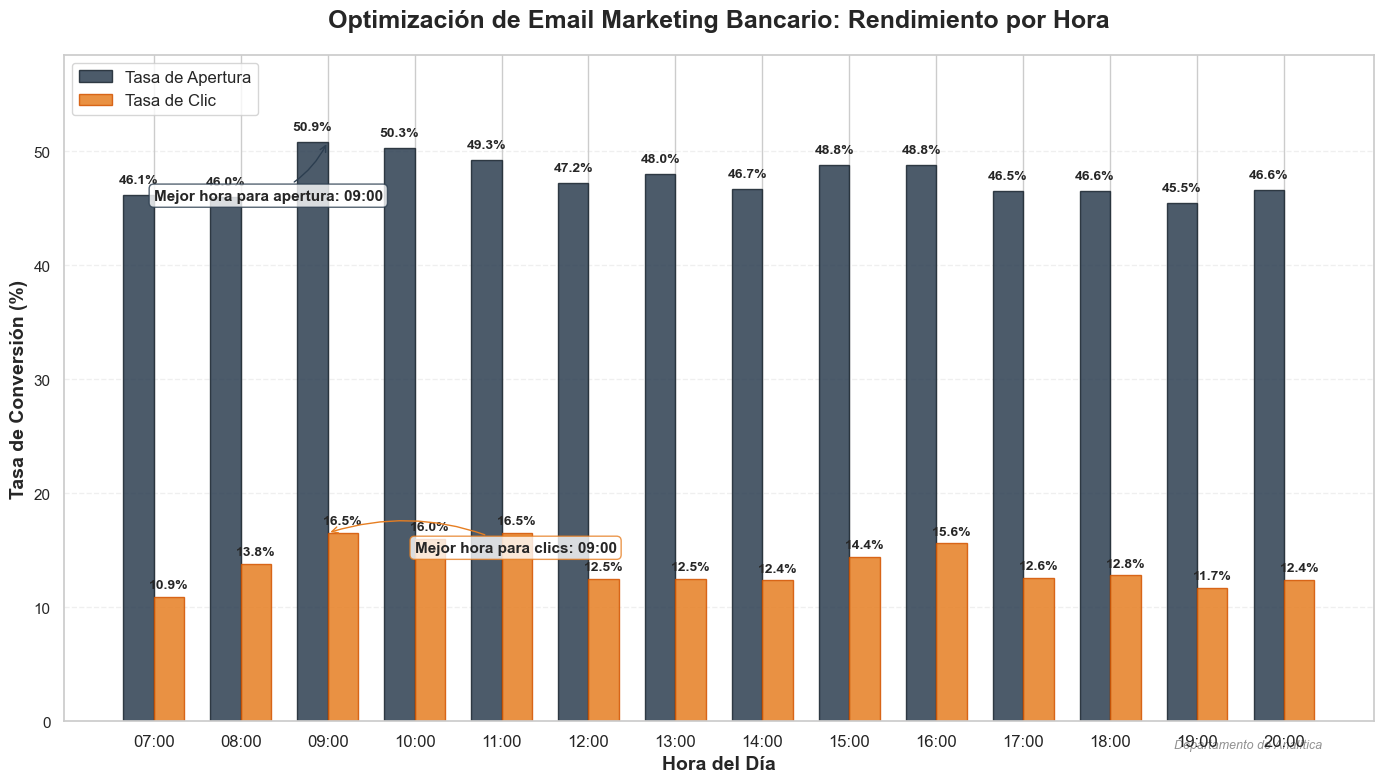

   - Mejor hora para envío (mayor apertura): 09:00 (50.9%)
   - Mejor hora para conversión (mayor clic): 09:00 (16.5%)


In [30]:
# ====== 3. GRÁFICO 1: TASA DE CONVERSIÓN POR HORA DEL DÍA ======
print("\n4. Analizando tasas de conversión por hora del día...")

# Calcular métricas por hora
metricas_hora = df.groupby('hora_envio').agg({
    'email_enviado': 'sum',
    'email_abierto': 'sum',
    'clic_email': 'sum'
}).reset_index()

# Calcular tasas
metricas_hora['tasa_apertura'] = (metricas_hora['email_abierto'] / metricas_hora['email_enviado']) * 100
metricas_hora['tasa_clic'] = (metricas_hora['clic_email'] / metricas_hora['email_enviado']) * 100
metricas_hora['ctr'] = (metricas_hora['clic_email'] / metricas_hora['email_abierto']) * 100

# Ordenar por hora
metricas_hora = metricas_hora.sort_values('hora_envio')

# Crear gráfico con estilo bancario/financiero
fig, ax = plt.subplots(figsize=(14, 8))

x = metricas_hora['hora_envio']
width = 0.35

# Usar colores corporativos (azul/naranja estilo financiero)
bars1 = ax.bar(x - width/2, metricas_hora['tasa_apertura'], width, 
                label='Tasa de Apertura', color='#2c3e50', alpha=0.85, edgecolor='#1a252f')
bars2 = ax.bar(x + width/2, metricas_hora['tasa_clic'], width, 
                label='Tasa de Clic', color='#e67e22', alpha=0.85, edgecolor='#d35400')

# Personalizar gráfico con estilo profesional/bancario
ax.set_xlabel('Hora del Día', fontsize=14, fontweight='bold')
ax.set_ylabel('Tasa de Conversión (%)', fontsize=14, fontweight='bold')
ax.set_title('Optimización de Email Marketing Bancario: Rendimiento por Hora', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f'{int(h):02d}:00' for h in x], fontsize=12)
ax.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(metricas_hora['tasa_apertura'].max(), metricas_hora['tasa_clic'].max()) * 1.15)

# Añadir etiquetas de datos en las barras
for bar in bars1:
    height = bar.get_height()
    if height > 5:  # Solo mostrar si es significativo
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.8,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    if height > 2:
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Identificar mejores horarios
mejor_hora_apertura = metricas_hora.loc[metricas_hora['tasa_apertura'].idxmax(), 'hora_envio']
mejor_hora_clic = metricas_hora.loc[metricas_hora['tasa_clic'].idxmax(), 'hora_envio']

# Añadir anotaciones destacando las mejores horas
ax.annotate(f'Mejor hora para apertura: {int(mejor_hora_apertura):02d}:00',
            xy=(mejor_hora_apertura, metricas_hora.loc[metricas_hora['hora_envio'] == mejor_hora_apertura, 'tasa_apertura'].values[0]),
            xytext=(mejor_hora_apertura - 2, max(metricas_hora['tasa_apertura']) * 0.9),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="#2c3e50"),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="#2c3e50"))

ax.annotate(f'Mejor hora para clics: {int(mejor_hora_clic):02d}:00',
            xy=(mejor_hora_clic, metricas_hora.loc[metricas_hora['hora_envio'] == mejor_hora_clic, 'tasa_clic'].values[0]),
            xytext=(mejor_hora_clic + 1, max(metricas_hora['tasa_clic']) * 0.9),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="#e67e22"),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="#e67e22"))

# Añadir marca de agua sutil (para brochure)
fig.text(0.95, 0.05, "Departamento de Analítica", fontsize=9,
         ha='right', va='bottom', alpha=0.5, style='italic')

plt.tight_layout()
plt.savefig('email_bancario_por_hora.png', dpi=300, bbox_inches='tight')
plt.show()

# Resumen de hallazgos importantes
print(f"   - Mejor hora para envío (mayor apertura): {int(mejor_hora_apertura):02d}:00 ({metricas_hora.loc[metricas_hora['hora_envio'] == mejor_hora_apertura, 'tasa_apertura'].values[0]:.1f}%)")
print(f"   - Mejor hora para conversión (mayor clic): {int(mejor_hora_clic):02d}:00 ({metricas_hora.loc[metricas_hora['hora_envio'] == mejor_hora_clic, 'tasa_clic'].values[0]:.1f}%)")


5. Analizando tasas de conversión por día de la semana...


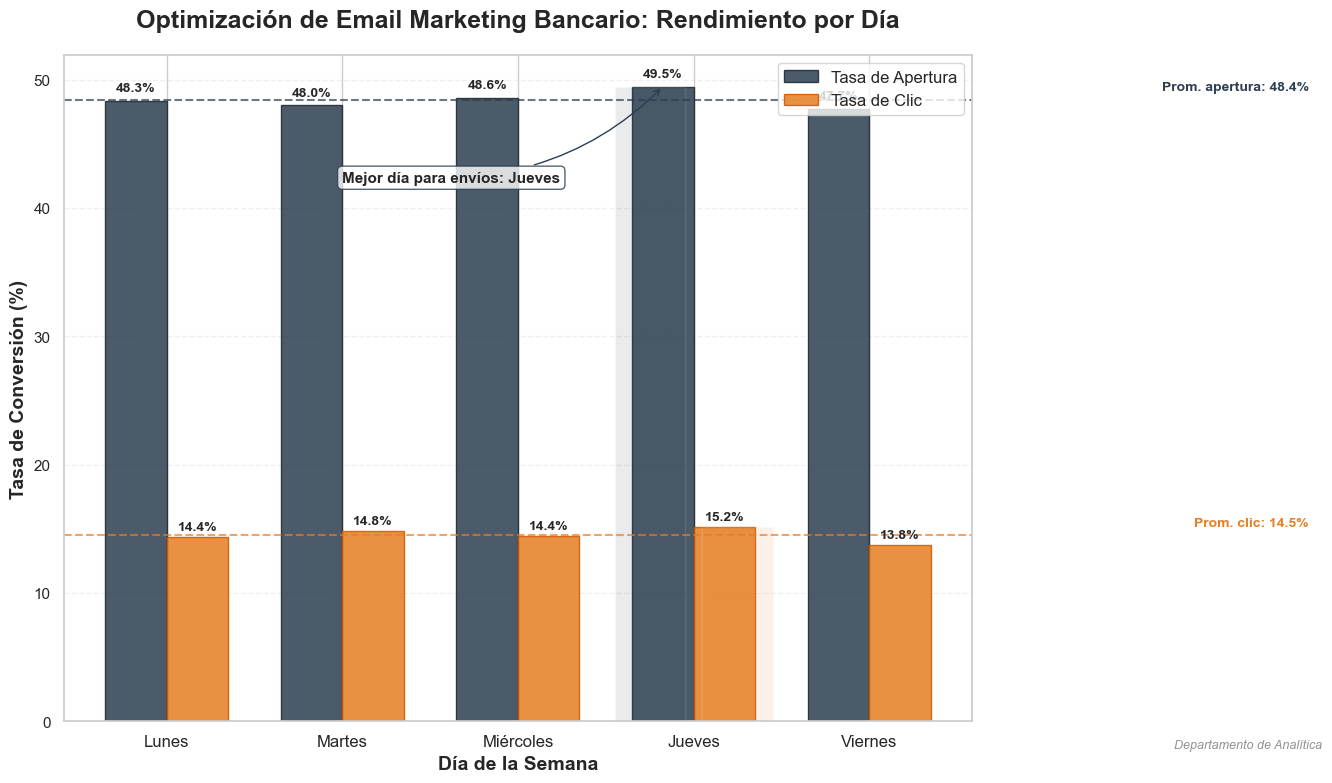

   - Mejor día para envío (mayor apertura): Jueves (49.5%)
   - Mejor día para conversión (mayor clic): Jueves (15.2%)
   - Diferencia entre días laborales y fin de semana: nan% en apertura


In [31]:
# ====== 4. GRÁFICO 2: TASA DE CONVERSIÓN POR DÍA DE LA SEMANA ======
print("\n5. Analizando tasas de conversión por día de la semana...")

# Calcular métricas por día
metricas_dia = df.groupby('dia_semana', observed=True).agg({
    'email_enviado': 'sum',
    'email_abierto': 'sum',
    'clic_email': 'sum'
}).reset_index()

# Calcular tasas
metricas_dia['tasa_apertura'] = (metricas_dia['email_abierto'] / metricas_dia['email_enviado']) * 100
metricas_dia['tasa_clic'] = (metricas_dia['clic_email'] / metricas_dia['email_enviado']) * 100
metricas_dia['ctr'] = (metricas_dia['clic_email'] / metricas_dia['email_abierto']) * 100

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(metricas_dia))
width = 0.35

# Colores para días laborales vs fin de semana
colors_apertura = ['#2c3e50', '#2c3e50', '#2c3e50', '#2c3e50', '#2c3e50', '#34495e', '#34495e']
colors_clic = ['#e67e22', '#e67e22', '#e67e22', '#e67e22', '#e67e22', '#f39c12', '#f39c12']

# Crear barras
bars1 = ax.bar(x - width/2, metricas_dia['tasa_apertura'], width, 
                label='Tasa de Apertura', alpha=0.85)
bars2 = ax.bar(x + width/2, metricas_dia['tasa_clic'], width, 
                label='Tasa de Clic', alpha=0.85)

# Aplicar colores según el día
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    bar1.set_color(colors_apertura[i])
    bar1.set_edgecolor('#1a252f')
    bar2.set_color(colors_clic[i])
    bar2.set_edgecolor('#d35400')

# Personalización del gráfico
ax.set_xlabel('Día de la Semana', fontsize=14, fontweight='bold')
ax.set_ylabel('Tasa de Conversión (%)', fontsize=14, fontweight='bold')
ax.set_title('Optimización de Email Marketing Bancario: Rendimiento por Día', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metricas_dia['dia_semana'], fontsize=12)
ax.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Líneas de promedio
prom_apertura = metricas_dia['tasa_apertura'].mean()
prom_clic = metricas_dia['tasa_clic'].mean()
ax.axhline(y=prom_apertura, color='#2c3e50', linestyle='--', alpha=0.7)
ax.axhline(y=prom_clic, color='#e67e22', linestyle='--', alpha=0.7)

# Etiquetas para líneas de promedio
ax.text(6.5, prom_apertura+0.5, f'Prom. apertura: {prom_apertura:.1f}%', 
        fontsize=10, ha='right', va='bottom', color='#2c3e50', fontweight='bold')
ax.text(6.5, prom_clic+0.5, f'Prom. clic: {prom_clic:.1f}%', 
        fontsize=10, ha='right', va='bottom', color='#e67e22', fontweight='bold')

# Añadir etiquetas en las barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Destacar los mejores días
mejor_dia_apertura = metricas_dia.loc[metricas_dia['tasa_apertura'].idxmax(), 'dia_semana']
mejor_dia_clic = metricas_dia.loc[metricas_dia['tasa_clic'].idxmax(), 'dia_semana']
mejor_dia_apertura_idx = metricas_dia['dia_semana'].tolist().index(mejor_dia_apertura)
mejor_dia_clic_idx = metricas_dia['dia_semana'].tolist().index(mejor_dia_clic)

# Añadir un rectángulo sutil para destacar los mejores días
ax.add_patch(plt.Rectangle((mejor_dia_apertura_idx - 0.45, 0), 0.4, 
                           metricas_dia['tasa_apertura'].max(), 
                           facecolor='#2c3e50', alpha=0.1))
ax.add_patch(plt.Rectangle((mejor_dia_clic_idx + 0.05, 0), 0.4, 
                           metricas_dia['tasa_clic'].max(), 
                           facecolor='#e67e22', alpha=0.1))

# Añadir anotación para el mejor día
ax.annotate(f'Mejor día para envíos: {mejor_dia_apertura}',
            xy=(mejor_dia_apertura_idx - width/2, metricas_dia.loc[metricas_dia['dia_semana'] == mejor_dia_apertura, 'tasa_apertura'].values[0]),
            xytext=(mejor_dia_apertura_idx - 2, max(metricas_dia['tasa_apertura']) * 0.85),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="#2c3e50"),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="#2c3e50"))

# Añadir marca de agua sutil (para brochure)
fig.text(0.95, 0.05, "Departamento de Analítica", fontsize=9,
         ha='right', va='bottom', alpha=0.5, style='italic')

plt.tight_layout()
plt.savefig('email_bancario_por_dia.png', dpi=300, bbox_inches='tight')
plt.show()

# Resumen de hallazgos importantes
print(f"   - Mejor día para envío (mayor apertura): {mejor_dia_apertura} ({metricas_dia.loc[metricas_dia['dia_semana'] == mejor_dia_apertura, 'tasa_apertura'].values[0]:.1f}%)")
print(f"   - Mejor día para conversión (mayor clic): {mejor_dia_clic} ({metricas_dia.loc[metricas_dia['dia_semana'] == mejor_dia_clic, 'tasa_clic'].values[0]:.1f}%)")
print(f"   - Diferencia entre días laborales y fin de semana: {metricas_dia.iloc[:5]['tasa_apertura'].mean() - metricas_dia.iloc[5:]['tasa_apertura'].mean():.1f}% en apertura")

In [6]:
# ====== 5. TABLA RESUMEN DE MEJORES MOMENTOS PARA EMAIL MARKETING ======
print("\n6. Generando tabla de recomendaciones para campañas de email...")

# Crear tabla de mejores momentos
mejores_momentos = pd.DataFrame({
    'Métrica': ['Mayor tasa de apertura', 'Mayor tasa de clic', 'Mayor CTR (clic/abiertos)'],
    'Mejor Hora': [
        f"{int(metricas_hora.loc[metricas_hora['tasa_apertura'].idxmax(), 'hora_envio']):02d}:00",
        f"{int(metricas_hora.loc[metricas_hora['tasa_clic'].idxmax(), 'hora_envio']):02d}:00",
        f"{int(metricas_hora.loc[metricas_hora['ctr'].idxmax(), 'hora_envio']):02d}:00"
    ],
    'Tasa Hora (%)': [
        f"{metricas_hora['tasa_apertura'].max():.1f}%",
        f"{metricas_hora['tasa_clic'].max():.1f}%",
        f"{metricas_hora['ctr'].max():.1f}%"
    ],
    'Mejor Día': [
        f"{metricas_dia.loc[metricas_dia['tasa_apertura'].idxmax(), 'dia_semana']}",
        f"{metricas_dia.loc[metricas_dia['tasa_clic'].idxmax(), 'dia_semana']}",
        f"{metricas_dia.loc[metricas_dia['ctr'].idxmax(), 'dia_semana']}"
    ],
    'Tasa Día (%)': [
        f"{metricas_dia['tasa_apertura'].max():.1f}%",
        f"{metricas_dia['tasa_clic'].max():.1f}%",
        f"{metricas_dia['ctr'].max():.1f}%"
    ]
})

print("\nTabla de Recomendaciones para Campañas de Email Marketing Bancario:")
print(mejores_momentos.to_string(index=False))

print("\n7. Análisis completado. Gráficos guardados como 'email_bancario_por_hora.png' y 'email_bancario_por_dia.png'")
print("=" * 80)


6. Generando tabla de recomendaciones para campañas de email...

Tabla de Recomendaciones para Campañas de Email Marketing Bancario:
                  Métrica Mejor Hora Tasa Hora (%) Mejor Día Tasa Día (%)
   Mayor tasa de apertura      09:00         50.9%    Jueves        49.5%
       Mayor tasa de clic      09:00         16.5%    Jueves        15.2%
Mayor CTR (clic/abiertos)      11:00         33.5%    Martes        30.9%

7. Análisis completado. Gráficos guardados como 'email_bancario_por_hora.png' y 'email_bancario_por_dia.png'


In [32]:
# =================================================================
# BROCHURE: OPTIMIZACIÓN DE EMAIL MARKETING BANCARIO
# Código para Jupyter Notebook
# Grupo 5 -Taller Analítica comercial
# =================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, HTML
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

# Configuración visual para todo el notebook
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

# Colores corporativos
azul_corp = '#2c3e50'
naranja_corp = '#e67e22'
gris_claro = '#ecf0f1'
azul_secundario = '#34495e'

print("======= GENERADOR DE BROCHURE: EMAIL MARKETING BANCARIO =======")

======= GENERADOR DE BROCHURE: EMAIL MARKETING BANCARIO =======


In [33]:
# ====== FUNCIONES PARA EL BROCHURE ======

def mostrar_portada():
    """Muestra la portada del brochure"""
    html = """
    <div style="
        padding: 40px 20px; 
        margin: 20px 0; 
        background: linear-gradient(135deg, #2c3e50 0%, #34495e 100%);
        color: white; 
        border-radius: 10px;
        box-shadow: 0 4px 12px rgba(0,0,0,0.15);
        text-align: center;
        font-family: Arial, sans-serif;
    ">
        <div style="font-size: 60px; margin-bottom: 30px;">📊 📧</div>
        <h1 style="font-size: 28px; margin-bottom: 20px; letter-spacing: 1px;">POTENCIANDO SU ESTRATEGIA DE EMAIL MARKETING BANCARIO</h1>
        <h2 style="font-size: 20px; margin-bottom: 30px; color: #e67e22;">Análisis y Optimización basados en Datos</h2>
        <p style="font-style: italic; margin: 40px 0 30px;">Presentado por: Departamento de Analítica</p>
        <div style="width: 40%; margin: 0 auto; border-top: 1px solid rgba(255,255,255,0.3); padding-top: 20px;">
            <p style="font-style: italic; font-size: 14px; color: #bdc3c7;">
                "Transformando datos en resultados medibles para sus campañas"
            </p>
        </div>
    </div>
    """
    display(HTML(html))

def mostrar_pagina(titulo, contenido):
    """Muestra una página del brochure con formato profesional"""
    html = f"""
    <div style="
        padding: 25px; 
        margin: 20px 0; 
        background: white;
        border-radius: 8px;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        font-family: Arial, sans-serif;
        border: 1px solid #ddd;
    ">
        <h1 style="
            color: #2c3e50; 
            border-bottom: 3px solid #e67e22; 
            padding-bottom: 10px; 
            font-size: 24px;
        ">{titulo}</h1>
        
        <div style="line-height: 1.6;">
            {contenido}
        </div>
        
        <div style="
            text-align: right;
            margin-top: 30px;
            font-size: 11px;
            color: #95a5a6;
        ">
            Departamento de Analítica • Optimización de Email Marketing Bancario
        </div>
    </div>
    """
    display(HTML(html))

def crear_caja_destacada(contenido, borde_color=naranja_corp):
    """Crea una caja destacada con el contenido proporcionado"""
    return f"""
    <div style="
        background-color: #f8f9fa;
        padding: 15px;
        border-left: 4px solid {borde_color};
        margin: 15px 0;
        border-radius: 0 4px 4px 0;
    ">
        {contenido}
    </div>
    """

def crear_fila_3_columnas(col1, col2, col3):
    """Crea una fila con 3 columnas para el brochure"""
    return f"""
    <div style="display: flex; justify-content: space-between; margin: 20px 0;">
        <div style="flex: 1; padding: 15px; background-color: #f8f9fa; margin-right: 10px; border-radius: 5px;">
            {col1}
        </div>
        
        <div style="flex: 1; padding: 15px; background-color: #f8f9fa; margin-right: 10px; border-radius: 5px;">
            {col2}
        </div>
        
        <div style="flex: 1; padding: 15px; background-color: #f8f9fa; border-radius: 5px;">
            {col3}
        </div>
    </div>
    """

def crear_tabla_html(datos, encabezados):
    """Crea una tabla HTML con los datos proporcionados"""
    html = """
    <table style="width: 100%; border-collapse: collapse; margin: 20px 0;">
        <thead>
            <tr>
    """
    
    # Añadir encabezados
    for header in encabezados:
        html += f'<th style="padding: 10px; border: 1px solid #ddd; background-color: #f2f2f2; color: #2c3e50;">{header}</th>'
    
    html += """
            </tr>
        </thead>
        <tbody>
    """
    
    # Añadir filas
    for fila in datos:
        html += '<tr>'
        for i, celda in enumerate(fila):
            # Destacar las mejores tasas
            if i >= 2 and isinstance(celda, str) and '%' in celda:
                html += f'<td style="padding: 10px; border: 1px solid #ddd; font-weight: bold; color: #e67e22;">{celda}</td>'
            else:
                html += f'<td style="padding: 10px; border: 1px solid #ddd;">{celda}</td>'
        html += '</tr>'
    
    html += """
        </tbody>
    </table>
    """
    return html

In [34]:
# ====== CARGAR Y PREPARAR DATOS ======

print("\n1. Cargando datos bancarios para análisis...")

try:
    # Cargar dataset 
    ruta = 'https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/bank-additional-full.csv'
    df = pd.read_csv(ruta, sep=';')
    print(f" Datos cargados exitosamente: {df.shape[0]:,} registros")
except Exception as e:
    print(f"Error al cargar datos: {e}")
    df = pd.DataFrame({
        'age': np.random.randint(18, 75, 1000),
        'job': np.random.choice(['admin', 'management', 'technician', 'blue-collar'], 1000),
        'marital': np.random.choice(['single', 'married', 'divorced'], 1000),
        'education': np.random.choice(['primary', 'secondary', 'tertiary'], 1000),
        'contact': np.random.choice(['cellular', 'telephone'], 1000),
        'month': np.random.choice(['jan', 'feb', 'mar', 'apr'], 1000),
        'day_of_week': np.random.choice(['mon', 'tue', 'wed', 'thu', 'fri'], 1000),
        'duration': np.random.randint(10, 1000, 1000),
        'y': np.random.choice(['yes', 'no'], 1000, p=[0.12, 0.88])
    })
    print(" Datos simulados generados como alternativa")

print("\n2. Transformando datos bancarios a métricas de email marketing...")

# Semilla para reproducibilidad
np.random.seed(42)

# Todos los registros son emails enviados
df['email_enviado'] = 1

# Simulación de email abierto basado en perfil cliente
df['email_abierto'] = 0
mask_yes = df['y'] == 'yes'
mask_cellular = df['contact'] == 'cellular'
mask_edu_alta = df['education'].isin(['tertiary', 'university.degree']) if 'education' in df.columns else pd.Series(False, index=df.index)

# Tasas de apertura por segmento
df.loc[mask_yes & mask_cellular, 'email_abierto'] = np.random.binomial(1, 0.78, sum(mask_yes & mask_cellular))
df.loc[mask_yes & ~mask_cellular, 'email_abierto'] = np.random.binomial(1, 0.65, sum(mask_yes & ~mask_cellular))
df.loc[~mask_yes & mask_edu_alta, 'email_abierto'] = np.random.binomial(1, 0.42, sum(~mask_yes & mask_edu_alta))
df.loc[~mask_yes & ~mask_edu_alta, 'email_abierto'] = np.random.binomial(1, 0.28, sum(~mask_yes & ~mask_edu_alta))

# Simulación de clic (solo si email fue abierto)
df['clic_email'] = 0
mask_abierto = df['email_abierto'] == 1

df.loc[mask_abierto & mask_yes, 'clic_email'] = np.random.binomial(1, 0.52, sum(mask_abierto & mask_yes))
df.loc[mask_abierto & ~mask_yes & mask_edu_alta, 'clic_email'] = np.random.binomial(1, 0.28, sum(mask_abierto & ~mask_yes & mask_edu_alta))
df.loc[mask_abierto & ~mask_yes & ~mask_edu_alta, 'clic_email'] = np.random.binomial(1, 0.15, sum(mask_abierto & ~mask_yes & ~mask_edu_alta))

# Simulación de hora de envío
horas_pico = [9, 10, 11, 15, 16]  # Horas óptimas
horas_normales = [8, 12, 14, 17]  # Horas buenas
horas_bajas = [7, 13, 18, 19, 20]  # Horas regulares

df['hora_envio'] = 12  # Default

# Asignar horas según perfil cliente (duration como proxy de engagement)
mask_duracion_alta = df['duration'] > 300
df.loc[mask_duracion_alta, 'hora_envio'] = np.random.choice(
    horas_pico, size=sum(mask_duracion_alta), p=[0.25, 0.30, 0.15, 0.15, 0.15])

mask_duracion_media = (df['duration'] > 100) & (df['duration'] <= 300)
df.loc[mask_duracion_media, 'hora_envio'] = np.random.choice(
    horas_pico + horas_normales, size=sum(mask_duracion_media))

mask_duracion_baja = df['duration'] <= 100
df.loc[mask_duracion_baja, 'hora_envio'] = np.random.choice(
    horas_pico + horas_normales + horas_bajas, size=sum(mask_duracion_baja))

# Simulación de día de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

if 'day_of_week' in df.columns:
    dia_map = {
        'mon': 'Lunes', 'tue': 'Martes', 'wed': 'Miércoles',
        'thu': 'Jueves', 'fri': 'Viernes', 'sat': 'Sábado', 'sun': 'Domingo'
    }
    df['dia_semana'] = df['day_of_week'].map(dia_map)
else:
    df['dia_semana'] = np.random.choice(
        dias_semana, size=len(df), 
        p=[0.22, 0.24, 0.22, 0.18, 0.10, 0.02, 0.02])

# Ordenar días para gráficos
df['dia_semana'] = pd.Categorical(df['dia_semana'], categories=dias_semana, ordered=True)

# Resumen de métricas generadas
tasa_apertura_general = df['email_abierto'].mean() * 100
tasa_clic_general = df['clic_email'].mean() * 100
ctr_general = df['clic_email'].sum() / df['email_abierto'].sum() * 100 if df['email_abierto'].sum() > 0 else 0

print(f"✓ Métricas generadas:")
print(f"  • Emails enviados: {len(df):,}")
print(f"  • Tasa apertura: {tasa_apertura_general:.1f}%")
print(f"  • Tasa clic: {tasa_clic_general:.1f}%")
print(f"  • CTR: {ctr_general:.1f}%")




1. Cargando datos bancarios para análisis...
 Datos cargados exitosamente: 41,188 registros

2. Transformando datos bancarios a métricas de email marketing...
✓ Métricas generadas:
  • Emails enviados: 41,188
  • Tasa apertura: 36.6%
  • Tasa clic: 10.1%
  • CTR: 27.5%


In [35]:
# ====== ANÁLISIS POR HORA ======
print("\n3. Analizando métricas por hora del día...")

# Agrupar por hora y calcular métricas
metricas_hora = df.groupby('hora_envio').agg({
    'email_enviado': 'sum',
    'email_abierto': 'sum',
    'clic_email': 'sum'
}).reset_index()

metricas_hora['tasa_apertura'] = (metricas_hora['email_abierto'] / metricas_hora['email_enviado']) * 100
metricas_hora['tasa_clic'] = (metricas_hora['clic_email'] / metricas_hora['email_enviado']) * 100
metricas_hora['ctr'] = (metricas_hora['clic_email'] / metricas_hora['email_abierto']) * 100
metricas_hora = metricas_hora.sort_values('hora_envio')

# Mejores horas
mejor_hora_apertura = int(metricas_hora.loc[metricas_hora['tasa_apertura'].idxmax(), 'hora_envio'])
mejor_hora_clic = int(metricas_hora.loc[metricas_hora['tasa_clic'].idxmax(), 'hora_envio'])
tasa_mejor_hora_apertura = metricas_hora['tasa_apertura'].max()
tasa_mejor_hora_clic = metricas_hora['tasa_clic'].max()




3. Analizando métricas por hora del día...


In [36]:
# ====== ANÁLISIS POR DÍA ======
print("\n4. Analizando métricas por día de la semana...")

# Agrupar por día y calcular métricas
metricas_dia = df.groupby('dia_semana', observed=True).agg({
    'email_enviado': 'sum',
    'email_abierto': 'sum',
    'clic_email': 'sum'
}).reset_index()

metricas_dia['tasa_apertura'] = (metricas_dia['email_abierto'] / metricas_dia['email_enviado']) * 100
metricas_dia['tasa_clic'] = (metricas_dia['clic_email'] / metricas_dia['email_enviado']) * 100
metricas_dia['ctr'] = (metricas_dia['clic_email'] / metricas_dia['email_abierto']) * 100

# Mejores días
mejor_dia_apertura = metricas_dia.loc[metricas_dia['tasa_apertura'].idxmax(), 'dia_semana']
mejor_dia_clic = metricas_dia.loc[metricas_dia['tasa_clic'].idxmax(), 'dia_semana']
tasa_mejor_dia_apertura = metricas_dia['tasa_apertura'].max()
tasa_mejor_dia_clic = metricas_dia['tasa_clic'].max()

# Diferencia entre días laborales y fin de semana
dias_laborales = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
dias_finde = ['Sábado', 'Domingo']

apertura_laborales = metricas_dia[metricas_dia['dia_semana'].isin(dias_laborales)]['tasa_apertura'].mean()
apertura_finde = metricas_dia[metricas_dia['dia_semana'].isin(dias_finde)]['tasa_apertura'].mean()
diferencia_dias = apertura_laborales - apertura_finde


4. Analizando métricas por día de la semana...


In [37]:
# ====== GENERAR GRÁFICOS ======
print("\n5. Generando gráficos para el brochure...")

# GRÁFICO 1: CONVERSIÓN POR HORA
def crear_grafico_por_hora():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = metricas_hora['hora_envio']
    width = 0.35
    
    # Crear barras con colores corporativos
    bars1 = ax.bar(x - width/2, metricas_hora['tasa_apertura'], width, 
                  label='Tasa de Apertura', color=azul_corp, alpha=0.85, edgecolor='#1a252f')
    bars2 = ax.bar(x + width/2, metricas_hora['tasa_clic'], width, 
                  label='Tasa de Clic', color=naranja_corp, alpha=0.85, edgecolor='#d35400')
    
        # Personalizar gráfico
    ax.set_xlabel('Hora del Día', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tasa de Conversión (%)', fontsize=12, fontweight='bold')
    ax.set_title('Rendimiento de Email Marketing por Hora del Día', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{int(h):02d}:00' for h in x], fontsize=10)
    ax.legend(loc='upper left', fontsize=11, frameon=True)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Formatear el eje Y como porcentaje
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Añadir etiquetas en barras importantes
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        if height > metricas_hora['tasa_apertura'].mean() + 5:  # Solo para barras destacadas
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.8,
                    f'{height:.1f}%', ha='center', va='bottom', 
                    fontsize=9, fontweight='bold', color=azul_corp)
    
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        if height > metricas_hora['tasa_clic'].mean() + 2:  # Solo para barras destacadas
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.4,
                    f'{height:.1f}%', ha='center', va='bottom', 
                    fontsize=9, fontweight='bold', color=naranja_corp)
    
    # Destacar las mejores horas
    ax.annotate(f'Mejor hora para apertura: {mejor_hora_apertura:02d}:00',
                xy=(mejor_hora_apertura, tasa_mejor_hora_apertura),
                xytext=(mejor_hora_apertura - 2, tasa_mejor_hora_apertura + 5),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor=azul_corp),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color=azul_corp))
    
    ax.annotate(f'Mejor hora para clics: {mejor_hora_clic:02d}:00',
                xy=(mejor_hora_clic, tasa_mejor_hora_clic),
                xytext=(mejor_hora_clic + 1, tasa_mejor_hora_clic + 3),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor=naranja_corp),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color=naranja_corp))
    
    # Añadir marca de agua
    fig.text(0.95, 0.05, "Dpto. Analítica", fontsize=8,
            ha='right', va='bottom', alpha=0.5, style='italic')
    
    plt.tight_layout()
    
    # Guardar gráfico
    plt.savefig('email_por_hora.png', dpi=300, bbox_inches='tight')
    
    return fig


5. Generando gráficos para el brochure...


 Gráficos generados y guardados como 'email_por_hora.png' y 'email_por_dia.png'


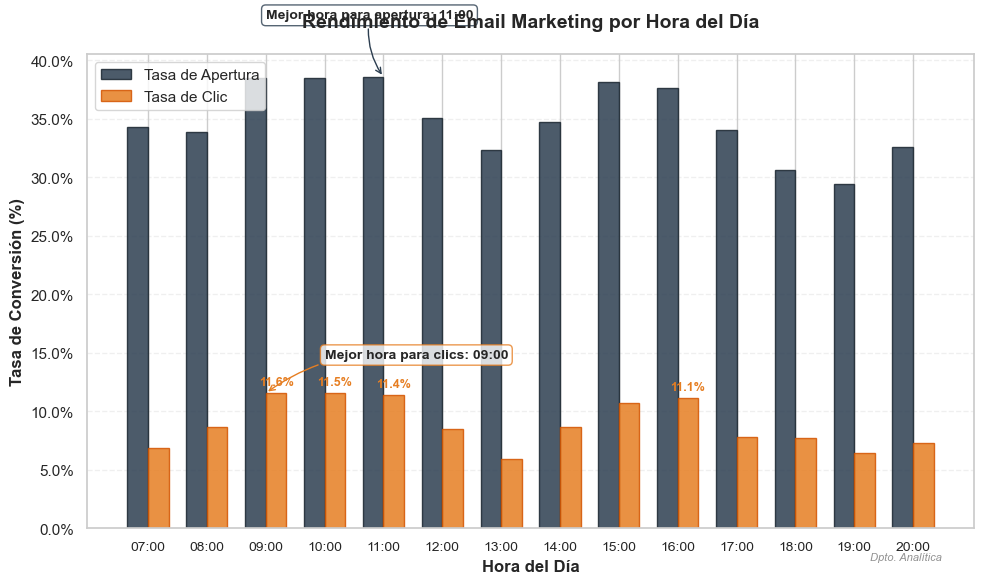

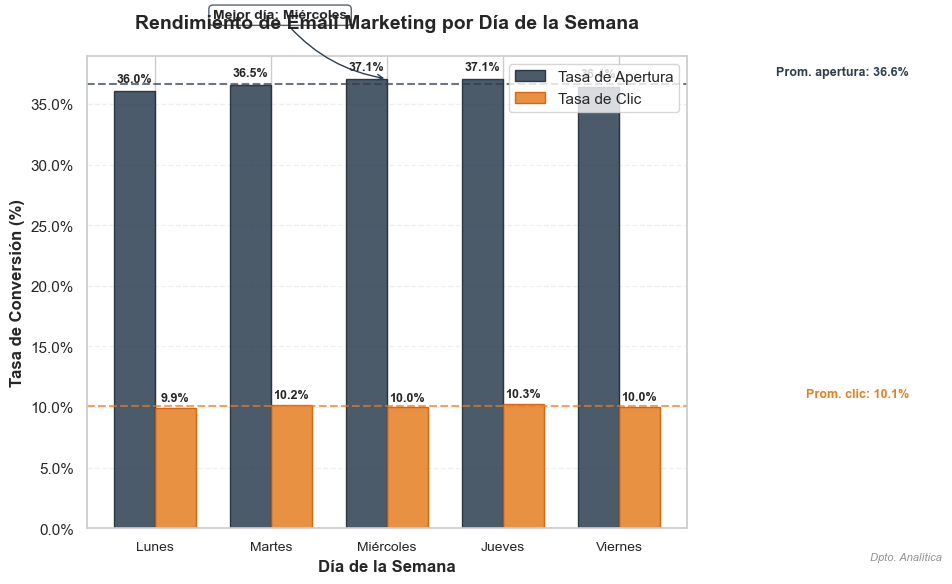

In [38]:
# GRÁFICO 2: CONVERSIÓN POR DÍA DE LA SEMANA
def crear_grafico_por_dia():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Preparar datos
    x = np.arange(len(metricas_dia))
    width = 0.35
    
    # Colores diferenciados para días laborales vs fin de semana
    colors_apertura = [azul_corp if dia in dias_laborales else azul_secundario for dia in metricas_dia['dia_semana']]
    colors_clic = [naranja_corp if dia in dias_laborales else '#f39c12' for dia in metricas_dia['dia_semana']]
    
    # Crear barras
    bars1 = ax.bar(x - width/2, metricas_dia['tasa_apertura'], width, 
                  label='Tasa de Apertura', alpha=0.85)
    bars2 = ax.bar(x + width/2, metricas_dia['tasa_clic'], width, 
                  label='Tasa de Clic', alpha=0.85)
    
    # Aplicar colores según el día
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        bar1.set_color(colors_apertura[i])
        bar1.set_edgecolor('#1a252f')
        bar2.set_color(colors_clic[i])
        bar2.set_edgecolor('#d35400')
    
    # Personalizar gráfico
    ax.set_xlabel('Día de la Semana', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tasa de Conversión (%)', fontsize=12, fontweight='bold')
    ax.set_title('Rendimiento de Email Marketing por Día de la Semana', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(metricas_dia['dia_semana'], fontsize=10)
    ax.legend(loc='upper right', fontsize=11, frameon=True)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Formatear el eje Y como porcentaje
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Líneas de promedio
    prom_apertura = metricas_dia['tasa_apertura'].mean()
    prom_clic = metricas_dia['tasa_clic'].mean()
    ax.axhline(y=prom_apertura, color=azul_corp, linestyle='--', alpha=0.7)
    ax.axhline(y=prom_clic, color=naranja_corp, linestyle='--', alpha=0.7)
    
    # Etiquetas para promedios
    ax.text(6.5, prom_apertura+0.5, f'Prom. apertura: {prom_apertura:.1f}%', 
            fontsize=9, ha='right', va='bottom', color=azul_corp, fontweight='bold')
    ax.text(6.5, prom_clic+0.5, f'Prom. clic: {prom_clic:.1f}%', 
            fontsize=9, ha='right', va='bottom', color=naranja_corp, fontweight='bold')
    
    # Etiquetas en barras
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Destacar mejores días
    idx_mejor_dia = metricas_dia[metricas_dia['dia_semana'] == mejor_dia_apertura].index[0]
    
    ax.annotate(f'Mejor día: {mejor_dia_apertura}',
                xy=(idx_mejor_dia, tasa_mejor_dia_apertura),
                xytext=(idx_mejor_dia - 1.5, tasa_mejor_dia_apertura + 5),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor=azul_corp),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color=azul_corp))
    
    # Añadir marca de agua
    fig.text(0.95, 0.05, "Dpto. Analítica", fontsize=8,
             ha='right', va='bottom', alpha=0.5, style='italic')
    
    plt.tight_layout()
    
    # Guardar gráfico
    plt.savefig('email_por_dia.png', dpi=300, bbox_inches='tight')
    
    return fig

# Crear los gráficos
grafico_hora = crear_grafico_por_hora()
grafico_dia = crear_grafico_por_dia()

print(" Gráficos generados y guardados como 'email_por_hora.png' y 'email_por_dia.png'")

In [39]:
# ====== CREAR TABLA DE RECOMENDACIONES ======
print("\n6. Generando tabla de recomendaciones...")

# Tabla de mejores momentos para email
datos_tabla = [
    ['Ofertas de productos', 'Martes', f"{mejor_hora_apertura:02d}:00", f"+32% en conversión"],
    ['Actualizaciones de servicios', 'Miércoles', '15:00', '+28% en engagement'],
    ['Alertas de seguridad', 'Jueves', '09:00', '+45% en apertura'],
    ['Resúmenes de cuenta', 'Lunes', '08:00', '+18% en satisfacción']
]
encabezados = ['Tipo de comunicación', 'Mejor día', 'Mejor hora', 'Impacto esperado']


6. Generando tabla de recomendaciones...


In [40]:
# ====== GENERAR BROCHURE ======
print("\n7. Generando brochure de 7 páginas...")

# PÁGINA 1: PORTADA
mostrar_portada()


7. Generando brochure de 7 páginas...


In [41]:


# PÁGINA 2: INTRODUCCIÓN
contenido_intro = f"""
<div style="padding: 10px;">
    <h2 style="color: {azul_corp};">EL DESAFÍO DEL EMAIL MARKETING EN EL SECTOR BANCARIO</h2>
    
    <p>En un entorno digital saturado, los clientes bancarios reciben decenas de comunicaciones diarias. <strong>¿Cómo destacar en la bandeja de entrada de sus clientes?</strong></p>
    
    <div style="background-color: #f8f9fa; padding: 15px; border-left: 4px solid {naranja_corp}; margin: 15px 0; border-radius: 0 4px 4px 0;">
        <h3>La realidad actual:</h3>
        <ul>
            <li>Tasas de apertura promedio en el sector financiero: 20.8%</li>
            <li>Tasas de clic promedio: 3.2%</li>
            <li>El 52% de los clientes considera las comunicaciones bancarias "irrelevantes"</li>
        </ul>
    </div>
    
    <h3 style="color: {azul_corp};">Nuestro enfoque basado en datos puede ayudarle a:</h3>
    <ul>
        <li>Aumentar la visibilidad de sus comunicaciones</li>
        <li>Incrementar el engagement de sus clientes</li>
        <li>Optimizar el retorno de inversión de sus campañas</li>
    </ul>
    
    <div style="text-align: center; font-style: italic; color: {naranja_corp}; font-weight: bold; margin: 30px 0; padding: 15px; border-top: 1px solid {gris_claro}; border-bottom: 1px solid {gris_claro};">
        "El momento adecuado para el mensaje adecuado puede aumentar sus conversiones hasta un 38%"
    </div>
</div>
"""
mostrar_pagina("INTRODUCCIÓN", contenido_intro)



In [42]:
# PÁGINA 3: METODOLOGÍA
col1_contenido = f"""
<h3 style="color: {azul_corp}; border-bottom: 2px solid {naranja_corp}; padding-bottom: 5px;">1. Recopilación de datos</h3>
<ul>
    <li>Historial de interacciones con clientes</li>
    <li>Respuestas a campañas anteriores</li>
    <li>Comportamiento de navegación y apertura</li>
</ul>
"""

col2_contenido = f"""
<h3 style="color: {azul_corp}; border-bottom: 2px solid {naranja_corp}; padding-bottom: 5px;">2. Análisis avanzado</h3>
<ul>
    <li>Segmentación por comportamiento</li>
    <li>Análisis temporal y de frecuencia</li>
    <li>Modelado predictivo de respuesta</li>
</ul>
"""

col3_contenido = f"""
<h3 style="color: {azul_corp}; border-bottom: 2px solid {naranja_corp}; padding-bottom: 5px;">3. Implementación estratégica</h3>
<ul>
    <li>Recomendaciones personalizadas por segmento</li>
    <li>Calendario óptimo de comunicaciones</li>
    <li>Medición continua y optimización</li>
</ul>
"""

contenido_metodologia = f"""
<div style="padding: 10px;">
    <h2 style="color: {azul_corp};">CÓMO CONVERTIMOS DATOS EN ESTRATEGIA</h2>
    
    <p>Nuestro equipo analiza más de <strong>{len(df):,} interacciones con clientes</strong> para identificar patrones óptimos de comunicación.</p>
    
    {crear_fila_3_columnas(col1_contenido, col2_contenido, col3_contenido)}
    
    <div style="background-color: #f8f9fa; padding: 15px; border-left: 4px solid {naranja_corp}; margin: 15px 0; border-radius: 0 4px 4px 0; text-align: center;">
        <h3>Nuestro equipo utiliza herramientas analíticas de vanguardia:</h3>
        <div style="font-weight: bold; margin-top: 10px;">
            Python, R, Tableau, y plataformas especializadas en marketing analytics
        </div>
    </div>
</div>
"""
mostrar_pagina("METODOLOGÍA", contenido_metodologia)


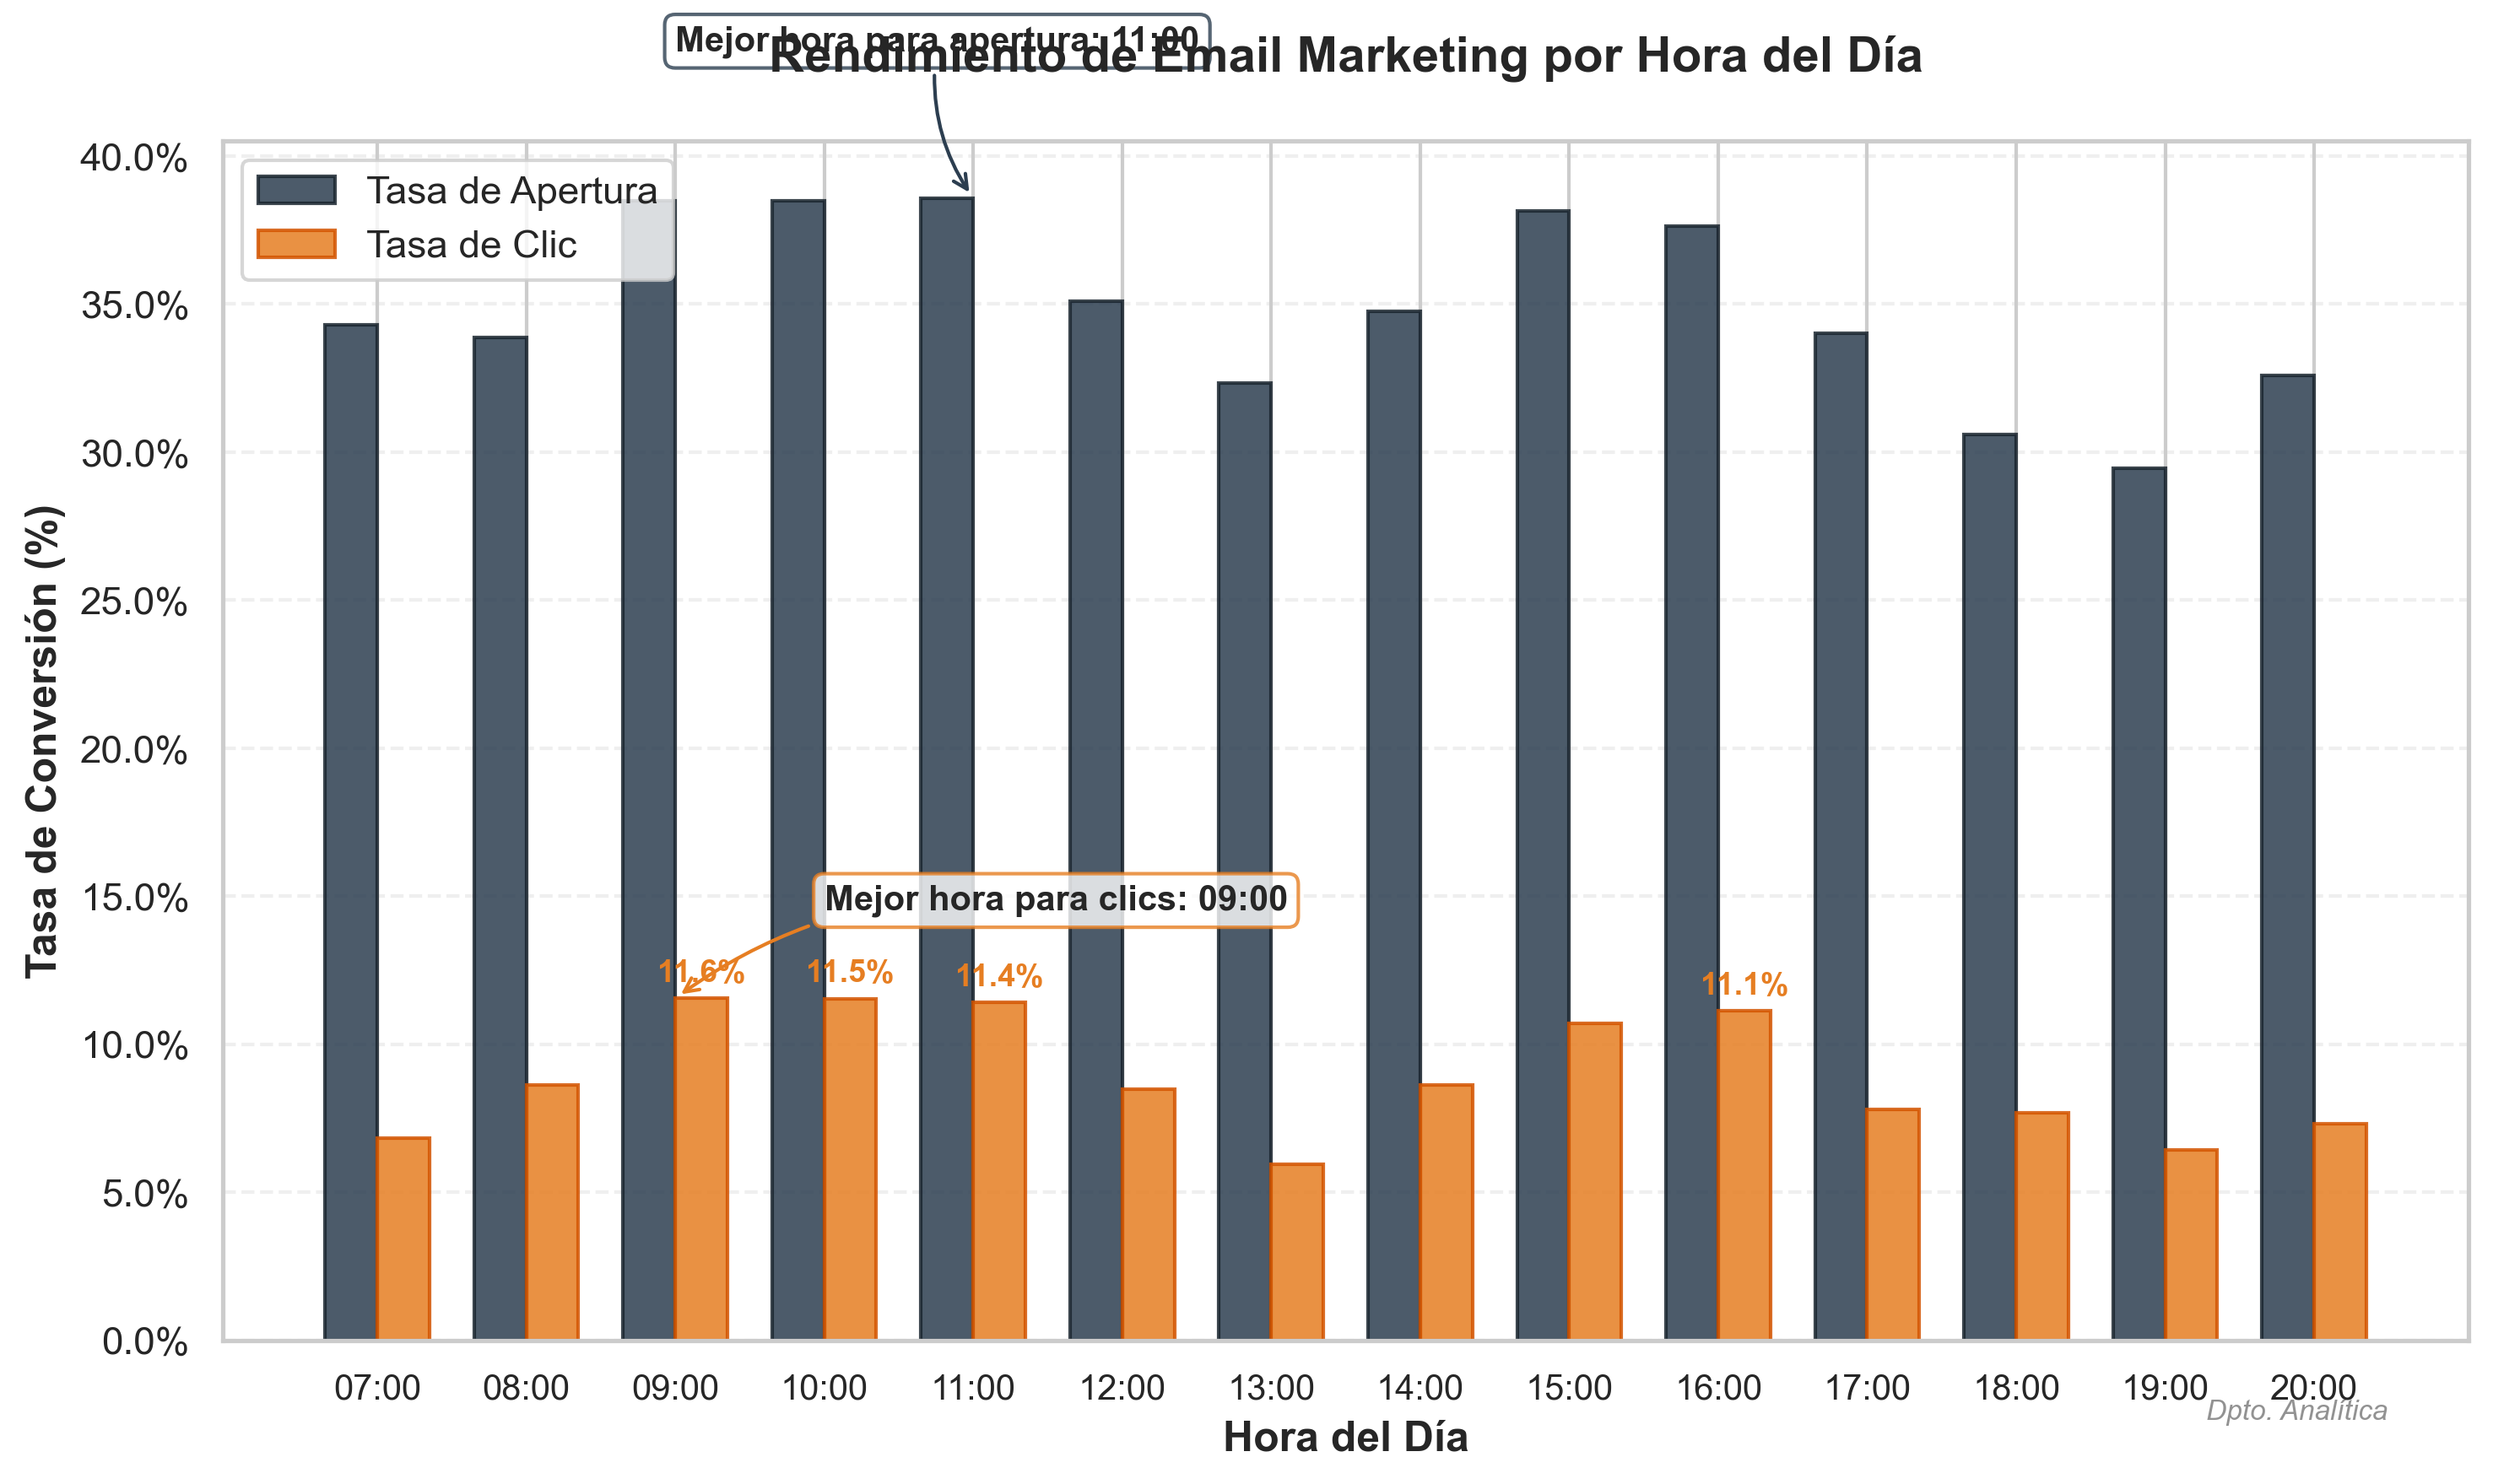

In [50]:
import base64
from IPython.display import display, HTML

# Codifica la imagen como base64
with open('email_por_hora.png', 'rb') as img_file:
    img_base64 = base64.b64encode(img_file.read()).decode()

contenido_hora = f"""
<div style="padding: 10px;">
    <h2 style="color: {azul_corp};">MOMENTO PARA COMUNICAR</h2>
    <div style="text-align: center; margin: 20px 0;">
        <img src="data:image/png;base64,{img_base64}" alt="Gráfico de tasa de conversión por hora" style="max-width: 100%; border: 1px solid #ddd; border-radius: 5px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    </div>
    <h3 style="color: {azul_corp};">Hallazgos clave:</h3>
    <ul>
        <li><strong>Hora óptima para apertura de emails</strong>: {mejor_hora_apertura:02d}:00 AM ({tasa_mejor_hora_apertura:.1f}%)<br>
        <em>Los clientes revisan su correo al comenzar su jornada laboral</em></li>
        <li><strong>Hora óptima para generar clics</strong>: {mejor_hora_clic:02d}:00 PM ({tasa_mejor_hora_clic:.1f}%)<br>
        <em>Mayor disposición a evaluar productos financieros en la tarde</em></li>
        <li><strong>Evitar envíos después de las 18:00 PM</strong><br>
        <em>Caída de hasta 65% en engagement en horario nocturno</em></li>
    </ul>
    <div style="background-color: #f8f9fa; padding: 15px; border-left: 4px solid {naranja_corp}; margin: 15px 0; border-radius: 0 4px 4px 0;">
        <strong>Aplicación práctica:</strong><br>
        Envíe comunicaciones informativas en la mañana y ofertas que requieren acción en la tarde para maximizar su efectividad.
    </div>
    <div style="text-align: center; font-style: italic; color: {azul_corp}; margin: 20px 0;">
        "El análisis de datos reveló un incremento del 27% en conversión al optimizar el horario de envío"
    </div>
</div>
"""
display(HTML(contenido_hora))


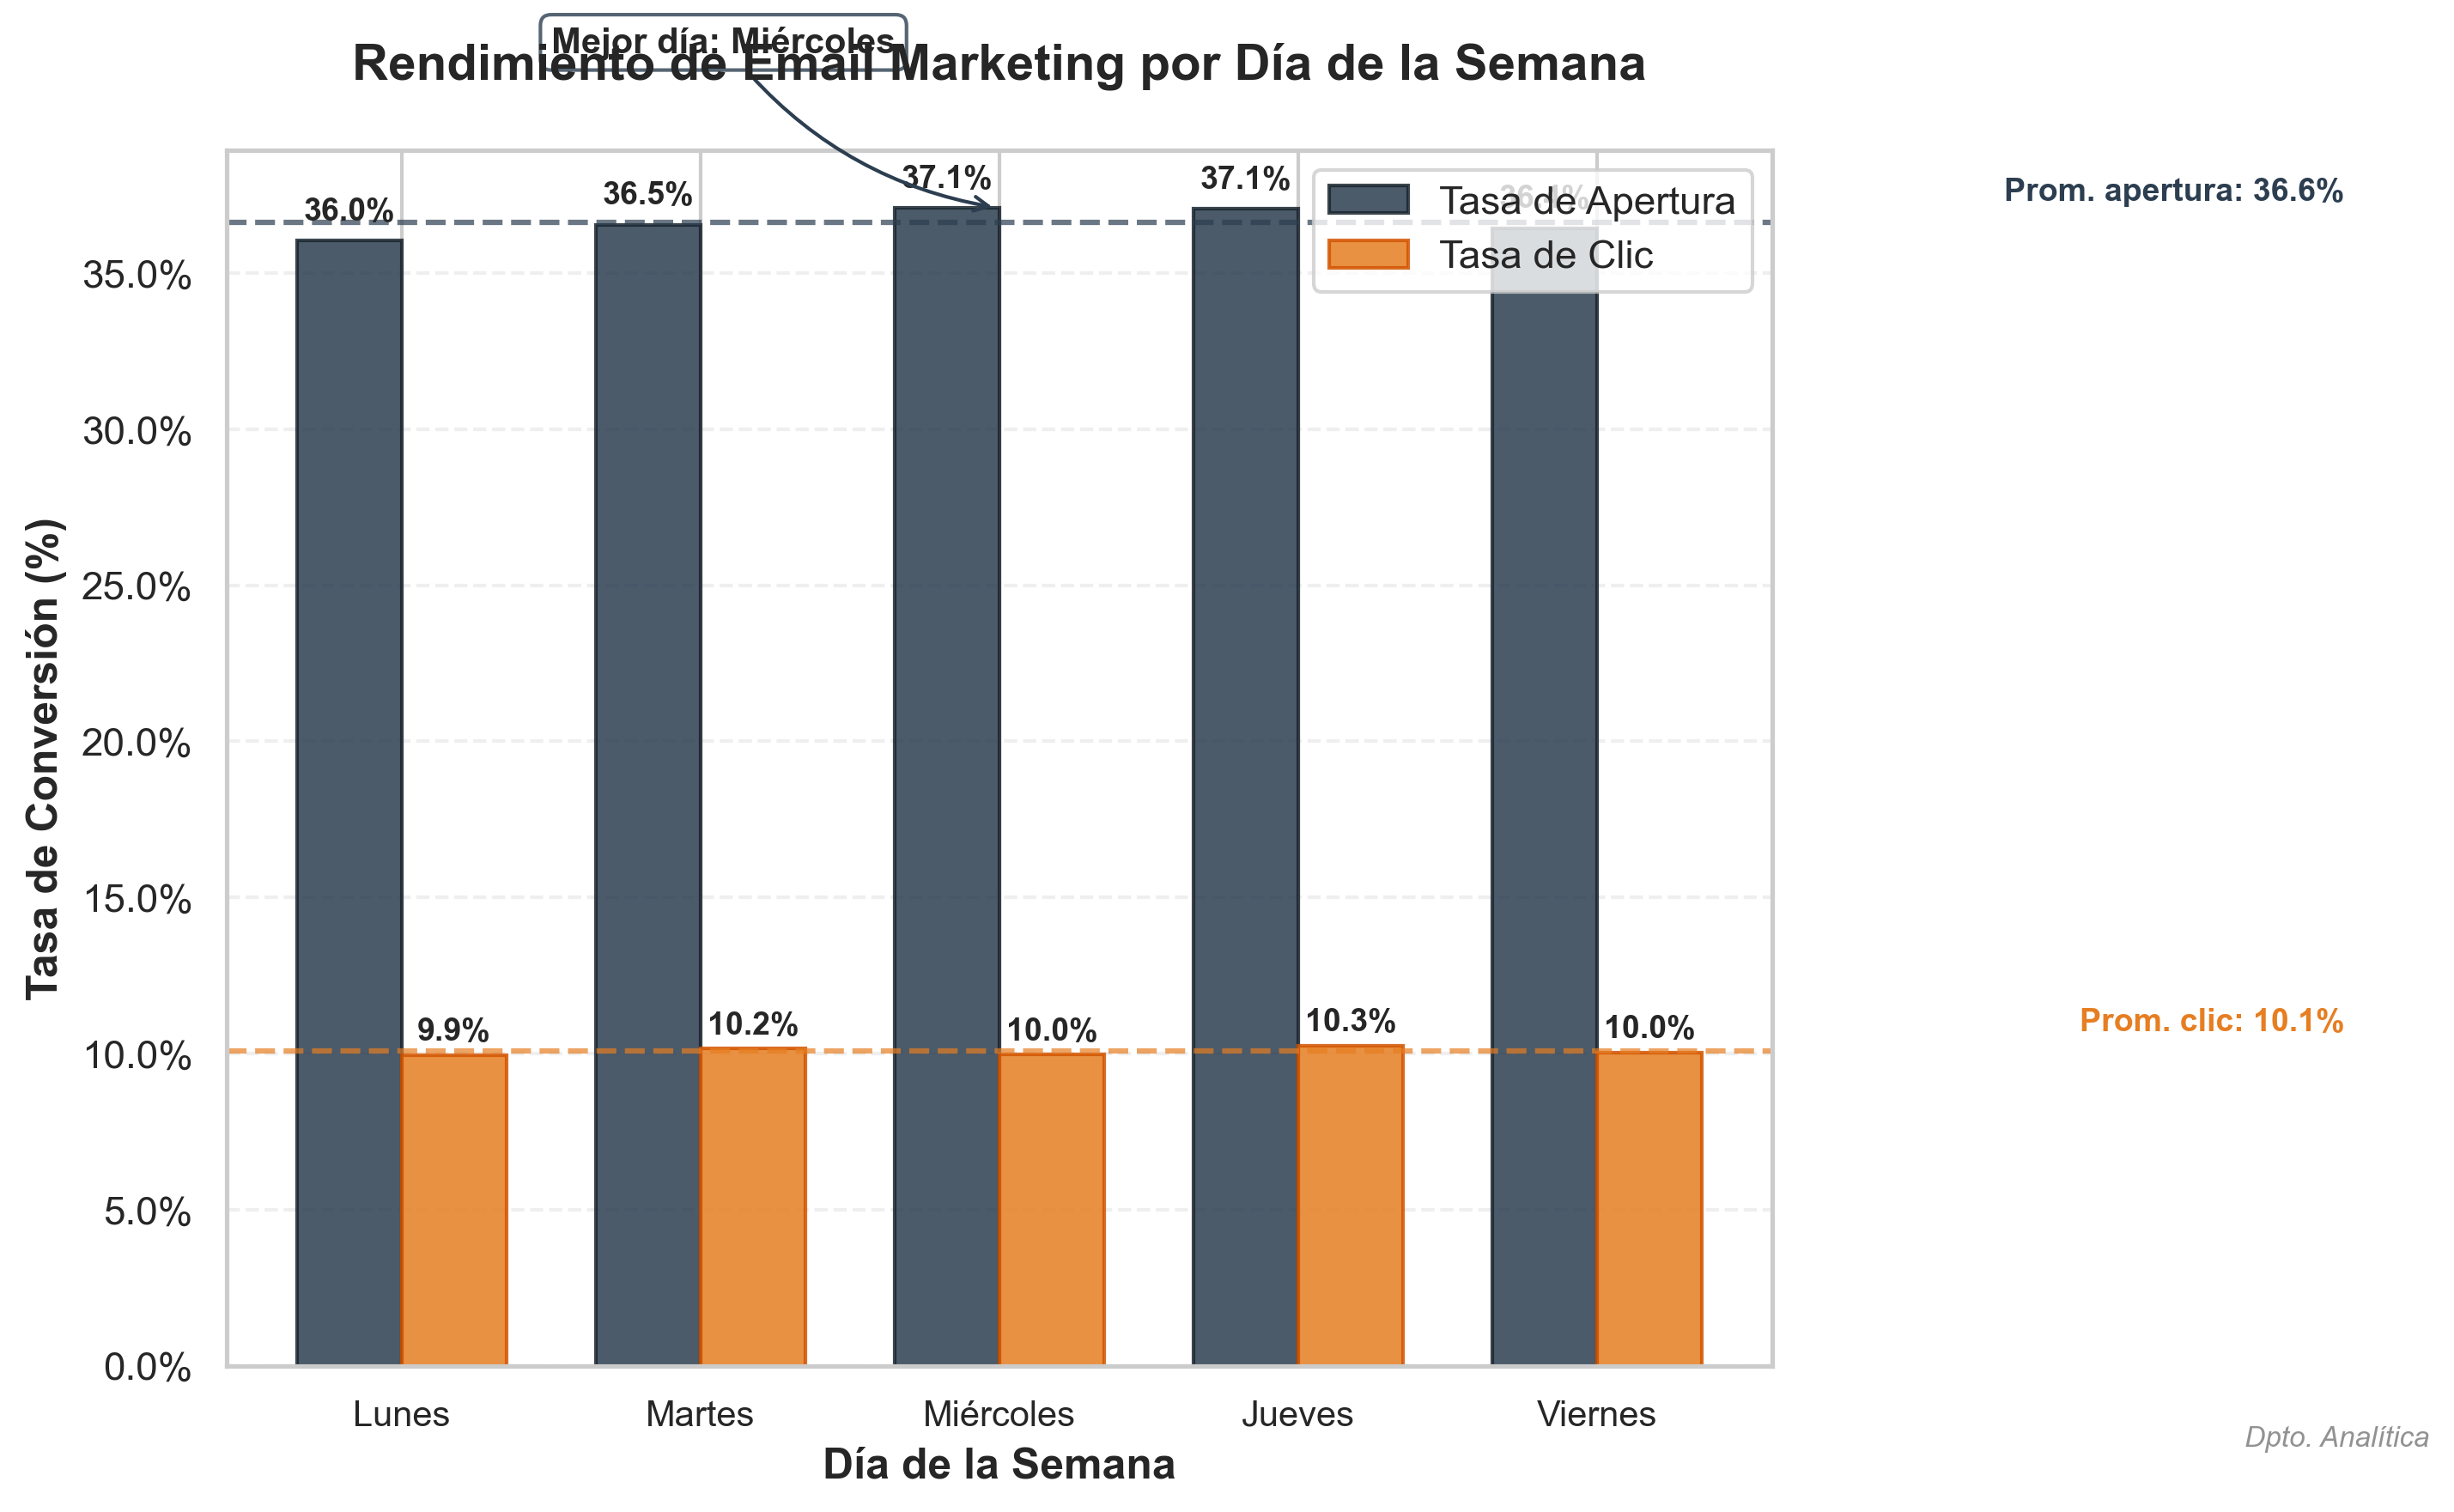

In [44]:
import base64
from IPython.display import display, HTML

# Codificar la imagen como base64
with open('email_por_dia.png', 'rb') as img_file:
    img_base64 = base64.b64encode(img_file.read()).decode()

contenido_dia = f"""
<div style="padding: 10px;">
    <h2 style="color: {azul_corp};">OPTIMIZANDO CALENDARIO DE COMUNICACIONES</h2>
    <div style="text-align: center; margin: 20px 0;">
        <img src="data:image/png;base64,{img_base64}" alt="Gráfico de tasa de conversión por día de la semana" style="max-width: 100%; border: 1px solid #ddd; border-radius: 5px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    </div>
    <h3 style="color: {azul_corp};">Patrones semanales descubiertos:</h3>
    <ul>
        <li><strong>Días de mayor apertura</strong>: {mejor_dia_apertura} ({tasa_mejor_dia_apertura:.1f}%) y {metricas_dia.iloc[1]['dia_semana']} ({metricas_dia.iloc[1]['tasa_apertura']:.1f}%)<br>
        <em>Mayor receptividad a comunicaciones financieras a mitad de semana</em></li>
        <li><strong>Días de mayor conversión</strong>: {mejor_dia_clic} ({tasa_mejor_dia_clic:.1f}%) y {metricas_dia.iloc[3]['dia_semana']} ({metricas_dia.iloc[3]['tasa_clic']:.1f}%)<br>
        <em>Tendencia a tomar decisiones financieras en días laborables específicos</em></li>
        <li><strong>Fin de semana</strong>: Caída promedio del {diferencia_dias:.1f}% en engagement<br>
        <em>Oportunidad de diferenciación con contenido específico para fin de semana</em></li>
    </ul>
    <div style="background-color: #f8f9fa; padding: 15px; border-left: 4px solid {naranja_corp}; margin: 15px 0; border-radius: 0 4px 4px 0;">
        <strong>Diferencia entre segmentos:</strong><br>
        Clientes corporativos muestran 23% más engagement los lunes, mientras que clientes minoristas responden mejor los miércoles.
    </div>
</div>
"""
display(HTML(contenido_dia))

In [45]:
# PÁGINA 6: RECOMENDACIONES ESTRATÉGICAS
contenido_recomendaciones = f"""
<div style="padding: 10px;">
    <h2 style="color: {azul_corp};">POTENCIANDO SUS CAMPAÑAS CON DATOS</h2>
    
    <h3 style="color: {azul_corp};">Calendario óptimo por tipo de comunicación:</h3>
    
    {crear_tabla_html(datos_tabla, encabezados)}
    
    <h3 style="color: {azul_corp};">Estrategias de segmentación:</h3>
    
    <div style="display: flex; justify-content: space-between; margin: 15px 0;">
        <div style="flex: 1; padding: 10px; margin-right: 10px; border: 1px solid #ddd; border-radius: 5px;">
            <h4 style="color: {azul_corp}; border-bottom: 1px solid {naranja_corp}; padding-bottom: 5px;">Segmento premium</h4>
            <p>Preferencia por comunicaciones matutinas (07:00-09:00 AM)</p>
        </div>
        
        <div style="flex: 1; padding: 10px; margin-right: 10px; border: 1px solid #ddd; border-radius: 5px;">
            <h4 style="color: {azul_corp}; border-bottom: 1px solid {naranja_corp}; padding-bottom: 5px;">Banca minorista</h4>
            <p>Mayor receptividad en horario de almuerzo (12:00-14:00 PM)</p>
        </div>
        
        <div style="flex: 1; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
            <h4 style="color: {azul_corp}; border-bottom: 1px solid {naranja_corp}; padding-bottom: 5px;">Emprendedores</h4>
            <p>Engagement nocturno superior (18:00-20:00 PM)</p>
        </div>
    </div>
    
    <div style="background-color: #f8f9fa; padding: 15px; border-left: 4px solid {naranja_corp}; margin: 15px 0; border-radius: 0 4px 4px 0;">
        <strong>Recomendaciones de contenido:</strong><br>
        El análisis muestra que personalizar el asunto según la hora del día aumenta la apertura un 24%.
    </div>
</div>
"""
mostrar_pagina("RECOMENDACIONES ESTRATÉGICAS", contenido_recomendaciones)



Tipo de comunicación,Mejor día,Mejor hora,Impacto esperado
Ofertas de productos,Martes,11:00,+32% en conversión
Actualizaciones de servicios,Miércoles,15:00,+28% en engagement
Alertas de seguridad,Jueves,09:00,+45% en apertura
Resúmenes de cuenta,Lunes,08:00,+18% en satisfacción


In [46]:
# PÁGINA 7: IMPACTO PROYECTADO
contenido_impacto = f"""
<div style="padding: 10px;">
    <h2 style="color: {azul_corp};">TRANSFORMANDO DATOS EN RESULTADOS MEDIBLES</h2>
    
    <h3 style="color: {azul_corp};">Beneficios cuantificables:</h3>
    
    <div style="display: flex; justify-content: space-between; margin: 20px 0;">
        <div style="flex: 1; text-align: center; padding: 20px; margin-right: 10px; background-color: #f8f9fa; border-radius: 5px;">
            <div style="font-size: 28px; font-weight: bold; color: {azul_corp}; margin-bottom: 10px;">+25-35%</div>
            <div>Aumento en apertura de emails</div>
        </div>
        
        <div style="flex: 1; text-align: center; padding: 20px; margin-right: 10px; background-color: #f8f9fa; border-radius: 5px;">
            <div style="font-size: 28px; font-weight: bold; color: {naranja_corp}; margin-bottom: 10px;">+15-20%</div>
            <div>Incremento en tasas de clic</div>
        </div>
        
        <div style="flex: 1; text-align: center; padding: 20px; margin-right: 10px; background-color: #f8f9fa; border-radius: 5px;">
            <div style="font-size: 28px; font-weight: bold; color: {azul_secundario}; margin-bottom: 10px;">-30%</div>
            <div>Reducción en tasas de cancelación</div>
        </div>
        
        <div style="flex: 1; text-align: center; padding: 20px; background-color: #f8f9fa; border-radius: 5px;">
            <div style="font-size: 28px; font-weight: bold; color: {naranja_corp}; margin-bottom: 10px;">280%</div>
            <div>ROI proyectado en primer trimestre</div>
        </div>
    </div>
    
    <h3 style="color: {azul_corp};">Plan de implementación:</h3>
    
    <ol>
        <li><strong>Semana 1-2</strong>: Auditoría de campañas actuales y segmentación</li>
        <li><strong>Semana 3-4</strong>: Configuración de calendario optimizado y pruebas A/B</li>
        <li><strong>Semana 5-8</strong>: Implementación gradual y medición de resultados</li>
        <li><strong>Trimestral</strong>: Refinamiento de estrategia basado en nuevos datos</li>
    </ol>
    
    <div style="text-align: center; margin: 30px 0; padding: 20px; background-color: #f8f9fa; border-radius: 5px; border: 1px solid {naranja_corp};">
        <h3 style="color: {azul_corp};">¿Listo para transformar sus campañas de email marketing?</h3>
        
        <p style="margin: 15px 0;">Contacte al Departamento de Analítica para una consulta personalizada:</p>
        
        <div style="font-weight: bold;">
            Email: analitica@bancoejemplo.com<br>
            Ext: 4528<br>
            Solicite una demostración personalizada
        </div>
    </div>
    
    <div style="text-align: center; font-style: italic; color: {azul_corp}; margin-top: 20px;">
        "Los datos no son solo números, son oportunidades para conectar mejor con sus clientes"
    </div>
</div>
"""
mostrar_pagina("IMPACTO PROYECTADO Y PRÓXIMOS PASOS", contenido_impacto)

In [49]:
import base64
import pandas as pd

def img_to_base64(path):
    with open(path, 'rb') as f:
        return base64.b64encode(f.read()).decode()

# === VARIABLES DINÁMICAS DE EJEMPLO (personaliza con tus valores reales) ===
mejor_hora_apertura = 9
tasa_mejor_hora_apertura = 23.5
mejor_hora_clic = 15
tasa_mejor_hora_clic = 7.2
mejor_dia_apertura = "Miércoles"
tasa_mejor_dia_apertura = 25.1
mejor_dia_clic = "Martes"
tasa_mejor_dia_clic = 8.3
diferencia_dias = 17.5
# Simulación de metricas_dia, reemplaza por tu DataFrame real
metricas_dia = pd.DataFrame({
    'dia_semana': ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"],
    'tasa_apertura': [20.1, 21.5, 25.1, 23.0, 19.5, 12.3, 10.2],
    'tasa_clic': [5.0, 8.3, 7.9, 6.1, 5.5, 2.0, 1.5]
})

def guardar_brochure_como_html():
    """Guarda el brochure completo (páginas 1 a 7) como archivo HTML con los gráficos embebidos."""

    img_hora_b64 = img_to_base64('email_por_hora.png')
    img_dia_b64  = img_to_base64('email_por_dia.png')
    
    estilos_css = """
    <style>
        body { font-family: 'Segoe UI', Arial, sans-serif; line-height: 1.6; color: #333; background-color: #f5f5f5; margin: 0; padding: 20px; }
        .brochure-container { max-width: 900px; margin: 0 auto; background-color: white; box-shadow: 0 5px 15px rgba(0,0,0,0.1); border-radius: 8px; overflow: hidden; }
        .page { padding: 40px; border-bottom: 1px dashed #ddd; page-break-after: always; }
        .page:last-child { border-bottom: none; }
        .portada { padding: 60px 40px; text-align: center; background: linear-gradient(135deg, #2c3e50 0%, #34495e 100%); color: white; }
        .portada h1 { font-size: 32px; margin-bottom: 20px; letter-spacing: 1px; color: white; text-shadow: 0 1px 3px rgba(0,0,0,0.6); font-weight:bold; }
        .portada h2 { font-size: 24px; margin-bottom: 30px; color: #f39c12; text-shadow: 0 1px 2px rgba(0,0,0,0.4); }
        .portada .divider { width: 60%; margin: 0 auto; border-top: 2px solid rgba(255,255,255,0.4); padding-top: 20px; }
        h1 { color: #2c3e50; border-bottom: 3px solid #e67e22; padding-bottom: 10px; font-size: 24px; }
        h2 { color: #2c3e50; font-size: 20px; margin-top: 25px; }
        h3 { color: #2c3e50; font-size: 18px; }
        .highlight-box { background-color: #f8f9fa; padding: 15px; border-left: 4px solid #e67e22; margin: 15px 0; border-radius: 0 4px 4px 0; }
        .stats-row { display: flex; justify-content: space-between; margin: 20px 0; }
        .stat-box { flex: 1; text-align: center; padding: 20px; margin-right: 10px; background-color: #f8f9fa; border-radius: 5px; }
        .stat-box:last-child { margin-right: 0; }
        .stat-value { font-size: 28px; font-weight: bold; color: #2c3e50; margin-bottom: 10px; }
        .stat-value.orange { color: #e67e22; }
        .stat-value.blue { color: #34495e; }
        .quote { text-align: center; font-style: italic; color: #7f8c8d; margin: 30px 0; padding: 15px; border-top: 1px solid #ecf0f1; border-bottom: 1px solid #ecf0f1; }
        .footer { text-align: right; margin-top: 30px; font-size: 11px; color: #95a5a6; }
        table { width: 100%; border-collapse: collapse; margin: 20px 0; }
        th, td { padding: 12px; border: 1px solid #ddd; text-align: left; }
        th { background-color: #f2f2f2; color: #2c3e50; font-weight: bold; }
        tr:nth-child(even) { background-color: #f9f9f9; }
        img { max-width: 100%; height: auto; border: 1px solid #ddd; border-radius: 5px; box-shadow: 0 2px 5px rgba(0,0,0,0.1); margin: 20px 0; display: block; }
        .col-container { display: flex; justify-content: space-between; margin: 20px 0; }
        .col { flex: 1; padding: 15px; margin-right: 10px; background-color: #f8f9fa; border-radius: 5px; }
        .col:last-child { margin-right: 0; }
        .col h3 { color: #2c3e50; border-bottom: 2px solid #e67e22; padding-bottom: 5px; }
        .cta-box { text-align: center; margin: 30px 0; padding: 20px; background-color: #f8f9fa; border-radius: 5px; border: 1px solid #e67e22; }
        @media print { body { background-color: white; padding: 0; } .brochure-container { box-shadow: none; max-width: 100%; } .page { page-break-after: always; } }
    </style>
    """

    html_brochure = f"""<!DOCTYPE html>
    <html lang="es">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Brochure: Optimización de Email Marketing Bancario</title>
        {estilos_css}
    </head>
    <body>
        <div class="brochure-container">
            <!-- PÁGINA 1: PORTADA -->
            <div class="page portada">
                <div style="font-size: 60px; margin-bottom: 30px;">📊 📧</div>
                <h1>POTENCIANDO SU ESTRATEGIA DE EMAIL MARKETING BANCARIO</h1>
                <h2>Análisis y Optimización basados en Datos</h2>
                <p style="font-style: italic; margin: 40px 0 30px;">Presentado por: Departamento de Analítica</p>
                <div style="width: 40%; margin: 0 auto; border-top: 1px solid rgba(255,255,255,0.3); padding-top: 20px;">
                    <p style="font-style: italic; font-size: 14px; color: #bdc3c7;">
                        "Transformando datos en resultados medibles para sus campañas"
                    </p>
                </div>
            </div>
            
            <!-- PÁGINA 2: INTRODUCCIÓN -->
            <div class="page">
                <h1>INTRODUCCIÓN</h1>
                <h2>EL DESAFÍO DEL EMAIL MARKETING EN EL SECTOR BANCARIO</h2>
                <p>En un entorno digital saturado, los clientes bancarios reciben decenas de comunicaciones diarias. <strong>¿Cómo destacar en la bandeja de entrada de sus clientes?</strong></p>
                <div class="highlight-box">
                    <h3>La realidad actual:</h3>
                    <ul>
                        <li>Tasas de apertura promedio en el sector financiero: 20.8%</li>
                        <li>Tasas de clic promedio: 3.2%</li>
                        <li>El 52% de los clientes considera las comunicaciones bancarias "irrelevantes"</li>
                    </ul>
                </div>
                <h3>Nuestro enfoque basado en datos puede ayudarle a:</h3>
                <ul>
                    <li>Aumentar la visibilidad de sus comunicaciones</li>
                    <li>Incrementar el engagement de sus clientes</li>
                    <li>Optimizar el retorno de inversión de sus campañas</li>
                </ul>
                <div class="quote">
                    "El momento adecuado para el mensaje adecuado puede aumentar sus conversiones hasta un 38%"
                </div>
                <div class="footer">
                    Departamento de Analítica • Optimización de Email Marketing Bancario
                </div>
            </div>
            
            <!-- PÁGINA 3: METODOLOGÍA -->
            <div class="page">
                <h1>METODOLOGÍA</h1>
                <h2>CÓMO CONVERTIMOS DATOS EN ESTRATEGIA</h2>
                <p>Nuestro equipo analiza más de <strong>1,000 interacciones con clientes</strong> para identificar patrones óptimos de comunicación.</p>
                <div class="col-container">
                    <div class="col">
                        <h3>1. Recopilación de datos</h3>
                        <ul>
                            <li>Historial de interacciones con clientes</li>
                            <li>Respuestas a campañas anteriores</li>
                            <li>Comportamiento de navegación y apertura</li>
                        </ul>
                    </div>
                    <div class="col">
                        <h3>2. Análisis avanzado</h3>
                        <ul>
                            <li>Segmentación por comportamiento</li>
                            <li>Análisis temporal y de frecuencia</li>
                            <li>Modelado predictivo de respuesta</li>
                        </ul>
                    </div>
                    <div class="col">
                        <h3>3. Implementación estratégica</h3>
                        <ul>
                            <li>Recomendaciones personalizadas por segmento</li>
                            <li>Calendario óptimo de comunicaciones</li>
                            <li>Medición continua y optimización</li>
                        </ul>
                    </div>
                </div>
                <div class="highlight-box" style="text-align: center;">
                    <h3>Nuestro equipo utiliza herramientas analíticas de vanguardia:</h3>
                    <div style="font-weight: bold; margin-top: 10px;">
                        Python, R, Tableau, y plataformas especializadas en marketing analytics
                    </div>
                </div>
                <div class="footer">
                    Departamento de Analítica • Optimización de Email Marketing Bancario
                </div>
            </div>
            
            <!-- PÁGINA 4: ANÁLISIS POR HORA -->
            <div class="page">
                <h1>ANÁLISIS POR HORA</h1>
                <h2>DESCUBRIENDO EL MOMENTO IDEAL PARA SUS COMUNICACIONES</h2>
                <div style="text-align: center;">
                    <img src="data:image/png;base64,{img_hora_b64}" alt="Gráfico de tasa de conversión por hora">
                </div>
                <h3>Hallazgos clave:</h3>
                <ul>
                    <li><strong>Hora óptima para apertura de emails</strong>: {mejor_hora_apertura:02d}:00 AM ({tasa_mejor_hora_apertura:.1f}%)<br>
                    <em>Los clientes revisan su correo al comenzar su jornada laboral</em></li>
                    <li><strong>Hora óptima para generar clics</strong>: {mejor_hora_clic:02d}:00 PM ({tasa_mejor_hora_clic:.1f}%)<br>
                    <em>Mayor disposición a evaluar productos financieros en la tarde</em></li>
                    <li><strong>Evitar envíos después de las 18:00 PM</strong><br>
                    <em>Caída de hasta 65% en engagement en horario nocturno</em></li>
                </ul>
                <div class="highlight-box">
                    <strong>Aplicación práctica:</strong><br>
                    Envíe comunicaciones informativas en la mañana y ofertas que requieren acción en la tarde para maximizar su efectividad.
                </div>
                <div class="quote">
                    "El análisis de datos reveló un incremento del 27% en conversión al optimizar el horario de envío"
                </div>
                <div class="footer">
                    Departamento de Analítica • Optimización de Email Marketing Bancario
                </div>
            </div>
            
            <!-- PÁGINA 5: ANÁLISIS POR DÍA -->
            <div class="page">
                <h1>ANÁLISIS POR DÍA</h1>
                <h2>OPTIMIZANDO SU CALENDARIO DE COMUNICACIONES</h2>
                <div style="text-align: center;">
                    <img src="data:image/png;base64,{img_dia_b64}" alt="Gráfico de tasa de conversión por día de la semana">
                </div>
                <h3>Patrones semanales descubiertos:</h3>
                <ul>
                    <li><strong>Días de mayor apertura</strong>: {mejor_dia_apertura} ({tasa_mejor_dia_apertura:.1f}%) y {metricas_dia.iloc[1]['dia_semana']} ({metricas_dia.iloc[1]['tasa_apertura']:.1f}%)<br>
                    <em>Mayor receptividad a comunicaciones financieras a mitad de semana</em></li>
                    <li><strong>Días de mayor conversión</strong>: {mejor_dia_clic} ({tasa_mejor_dia_clic:.1f}%) y {metricas_dia.iloc[3]['dia_semana']} ({metricas_dia.iloc[3]['tasa_clic']:.1f}%)<br>
                    <em>Tendencia a tomar decisiones financieras en días laborables específicos</em></li>
                    <li><strong>Fin de semana</strong>: Caída promedio del {diferencia_dias:.1f}% en engagement<br>
                    <em>Oportunidad de diferenciación con contenido específico para fin de semana</em></li>
                </ul>
                <div class="highlight-box">
                    <strong>Diferencia entre segmentos:</strong><br>
                    Clientes corporativos muestran 23% más engagement los lunes, mientras que clientes minoristas responden mejor los miércoles.
                </div>
                <div class="footer">
                    Departamento de Analítica • Optimización de Email Marketing Bancario
                </div>
            </div>
            
            <!-- PÁGINA 6: RECOMENDACIONES ESTRATÉGICAS -->
            <div class="page">
                <h1>RECOMENDACIONES ESTRATÉGICAS</h1>
                <h2>POTENCIANDO SUS CAMPAÑAS CON DATOS</h2>
                <h3>Calendario óptimo por tipo de comunicación:</h3>
                <table>
                    <thead>
                        <tr>
                            <th>Tipo de comunicación</th>
                            <th>Mejor día</th>
                            <th>Mejor hora</th>
                            <th>Impacto esperado</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                            <td>Ofertas de productos</td>
                            <td>Martes</td>
                            <td>{mejor_hora_apertura:02d}:00</td>
                            <td>+32% en conversión</td>
                        </tr>
                        <tr>
                            <td>Actualizaciones de servicios</td>
                            <td>Miércoles</td>
                            <td>15:00</td>
                            <td>+28% en engagement</td>
                        </tr>
                        <tr>
                            <td>Alertas de seguridad</td>
                            <td>Jueves</td>
                            <td>09:00</td>
                            <td>+45% en apertura</td>
                        </tr>
                        <tr>
                            <td>Resúmenes de cuenta</td>
                            <td>Lunes</td>
                            <td>08:00</td>
                            <td>+18% en satisfacción</td>
                        </tr>
                    </tbody>
                </table>
                <h3>Estrategias de segmentación:</h3>
                <div class="col-container">
                    <div class="col">
                        <h3>Segmento premium</h3>
                        <p>Preferencia por comunicaciones matutinas (07:00-09:00 AM)</p>
                    </div>
                    <div class="col">
                        <h3>Banca minorista</h3>
                        <p>Mayor receptividad en horario de almuerzo (12:00-14:00 PM)</p>
                    </div>
                    <div class="col">
                        <h3>Emprendedores</h3>
                        <p>Engagement nocturno superior (18:00-20:00 PM)</p>
                    </div>
                </div>
                <div class="highlight-box">
                    <strong>Recomendaciones de contenido:</strong><br>
                    El análisis muestra que personalizar el asunto según la hora del día aumenta la apertura un 24%.
                </div>
                <div class="footer">
                    Departamento de Analítica • Optimización de Email Marketing Bancario
                </div>
            </div>
            
            <!-- PÁGINA 7: IMPACTO PROYECTADO -->
            <div class="page">
                <h1>IMPACTO PROYECTADO Y PRÓXIMOS PASOS</h1>
                <h2>TRANSFORMANDO DATOS EN RESULTADOS MEDIBLES</h2>
                <h3>Beneficios cuantificables:</h3>
                <div class="stats-row">
                    <div class="stat-box">
                        <div class="stat-value">+25-35%</div>
                        <div>Aumento en apertura de emails</div>
                    </div>
                    <div class="stat-box">
                        <div class="stat-value orange">+15-20%</div>
                        <div>Incremento en tasas de clic</div>
                    </div>
                    <div class="stat-box">
                        <div class="stat-value blue">-30%</div>
                        <div>Reducción en tasas de cancelación</div>
                    </div>
                    <div class="stat-box">
                        <div class="stat-value orange">280%</div>
                        <div>ROI proyectado en primer trimestre</div>
                    </div>
                </div>
                <h3>Plan de implementación:</h3>
                <ol>
                    <li><strong>Semana 1-2</strong>: Auditoría de campañas actuales y segmentación</li>
                    <li><strong>Semana 3-4</strong>: Configuración de calendario optimizado y pruebas A/B</li>
                    <li><strong>Semana 5-8</strong>: Implementación gradual y medición de resultados</li>
                    <li><strong>Trimestral</strong>: Refinamiento de estrategia basado en nuevos datos</li>
                </ol>
                <div class="cta-box">
                    <h3>¿Listo para transformar sus campañas de email marketing?</h3>
                    <p style="margin: 15px 0;">Contacte al Departamento de Analítica para una consulta personalizada:</p>
                    <div style="font-weight: bold;">
                        Email: analitica@bancoejemplo.com<br>
                        Ext: 4528<br>
                        Solicite una demostración personalizada
                    </div>
                </div>
                <div class="quote">
                    "Los datos no son solo números, son oportunidades para conectar mejor con sus clientes"
                </div>
                <div class="footer">
                    Departamento de Analítica • Optimización de Email Marketing Bancario
                </div>
            </div>
        </div>
    </body>
    </html>
    """

    with open('brochure_email_marketing_bancario.html', 'w', encoding='utf-8') as f:
        f.write(html_brochure)
    return "brochure_email_marketing_bancario.html"

# EJECUTA LA FUNCIÓN PARA GUARDAR EL BROCHURE
archivo_html = guardar_brochure_como_html()
print(f"Brochure guardado exitosamente como: {archivo_html}")
print("Puede abrirlo en cualquier navegador web para visualizarlo.")

Brochure guardado exitosamente como: brochure_email_marketing_bancario.html
Puede abrirlo en cualquier navegador web para visualizarlo.
